<a href="https://colab.research.google.com/github/bastiansosa/procesamiento-digital/blob/main/procesamientodigital11().ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Descargar la imagen leaves.jpg desde el repositorio https://github.com/jorgevergara/PDI y utilice técnicas de procesamiento de imágenes que estime conveniente para segmentar las hojas más oscuras. Recuerde que debe eliminar todo rastro de tallo de las hojas.



In [97]:
import numpy as np
from skimage import data 
import matplotlib.pylab as plt
import skimage.io as io
# https://raw.githubusercontent.com/jorgevergara/PDI/main/leaves.jpg

In [98]:
imgcolor = io.imread("https://raw.githubusercontent.com/jorgevergara/PDI/main/leaves.jpg?raw=True")
imgray = io.imread("https://raw.githubusercontent.com/jorgevergara/PDI/main/leaves.jpg?raw=True", as_gray=True)

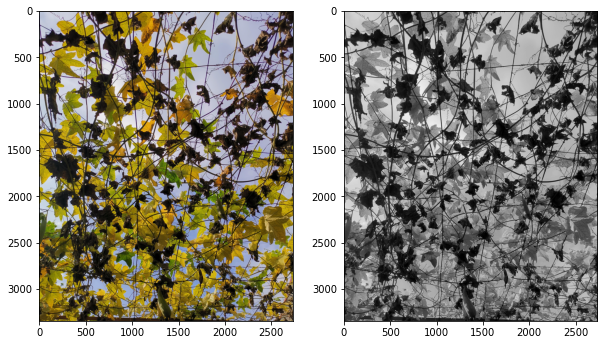

In [99]:
fig, ax = plt.subplots(1,2,figsize=(10,10))
ax[0].imshow(imgcolor)
ax[1].imshow(imgray, cmap="gray")

In [ ]:
imgray.max()

1.0

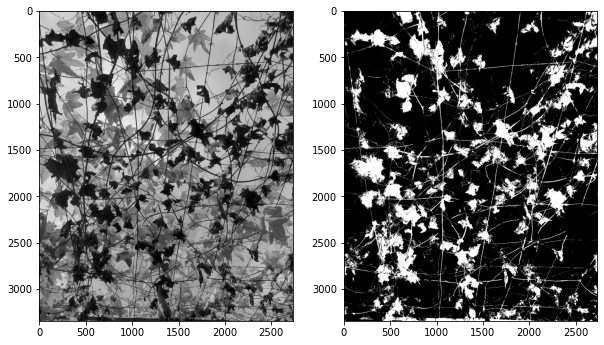

In [100]:
fig, ax = plt.subplots(1,2,figsize=(10,10))
ax[0].imshow(imgray,cmap="gray")
ax[1].imshow(imgray<0.15,cmap="gray") # buscamr todo los pixeles que el color o intensidad q sea menor a 0.15

In [101]:
#  eliminar los rastros de tallos de las hojas (aplicar concepto de erosion )

f = np.ones((7,7)) # para eliminar las lineas de los tallos aplicamos erosion 



In [102]:
def erosion (ima, kernel): # imagen y filtro 
  nfi,nci = ima.shape
  nfk,nck = kernel.shape
  res = np.zeros((nfi-nfk+1 ,nci-nck+1))
  for i in range(0,nfi-nfk+1):
    for j in range(0,nci-nck+1):
      temp = ima[i:i+nfk , j:j+nck] * kernel 
      if temp.sum() == kernel.sum():
        res[i,j] = 1
  return res



In [ ]:
im_binary = imgray < 0.15 
a = erosion(im_binary,f)

In [ ]:
from skimage.morphology import (erosion,dilation,closing,opening,area_closing,area_opening)

In [116]:
f2 = np.ones((5,5))
B = dilation(erosion(erosion(im_binary,f2),f2),f2) 

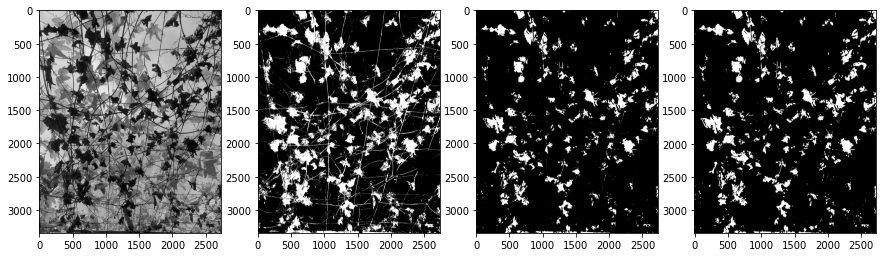

In [117]:
fig, ax = plt.subplots(1,4,figsize=(15,15))
ax[0].imshow(imgray,cmap="gray")
ax[1].imshow(im_binary,cmap="gray") 
ax[2].imshow(a,cmap="gray")
ax[3].imshow(B,cmap='gray')

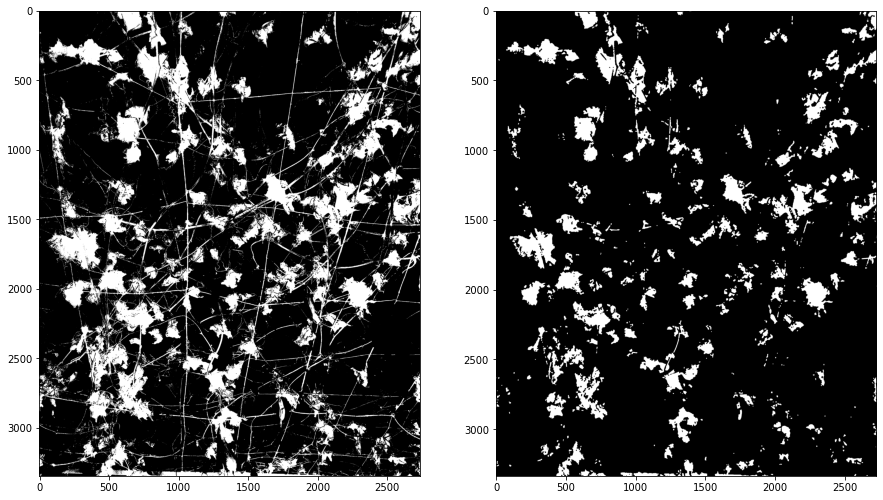

In [118]:
fig, ax = plt.subplots(1,2,figsize=(15,15))
ax[0].imshow(im_binary,cmap='gray')
ax[1].imshow(B,cmap='gray')


Desde la imagen coin desde from skimage import data obtenga lo siguiente

2.1. Encuentre el umbral óptimo para diferenciar todas las monedas con respecto al fondo.

In [104]:
coins = data.coins()

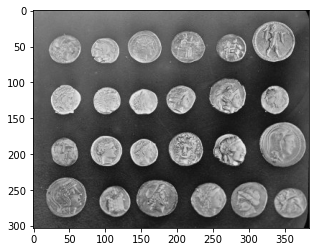

In [105]:
plt.imshow(coins, cmap="gray")

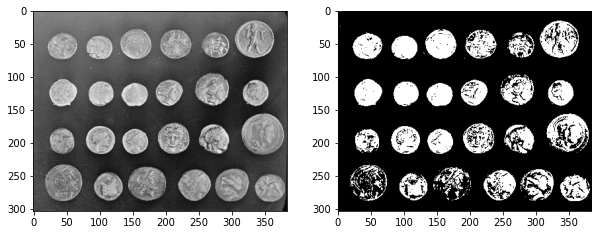

In [106]:
fig, axs = plt.subplots(1,2,figsize=(10,10))
axs[0].imshow(coins, cmap="gray")
axs[1].imshow(coins>140, cmap="gray")

In [107]:
coins_binary = coins>140

2.2) Utilizando el filtro canny (from skimage.feature import canny) detecte los bordes de las monedas. Compare su resultado con el filtro de deteccion de bordes visto en clases (sobel)

In [108]:
from skimage.feature import canny

In [109]:
coins_canny = canny(coins_binary)

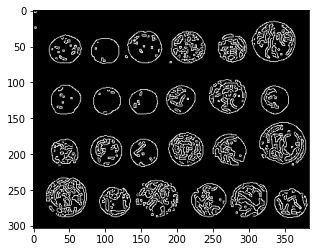

In [110]:
plt.imshow(coins_canny, cmap="gray")

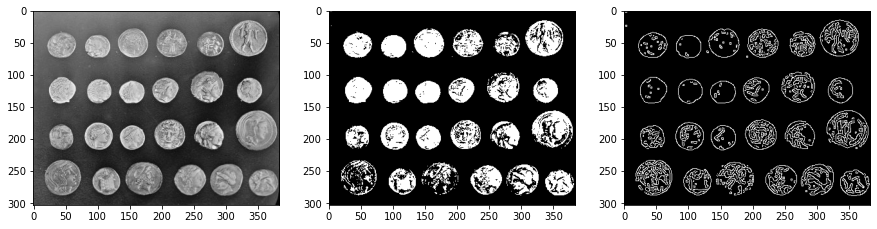

In [111]:

fig, ax = plt.subplots(1,3,figsize=(15,10))
ax[0].imshow(coins, cmap="gray")
ax[1].imshow(coins_binary, cmap="gray")
ax[2].imshow(coins_canny, cmap="gray")

2.3) Utilice la función ndi.binary_fill_holes desde from scipy import ndimage as ndi para rellenar los huecos desde el ejercicio 2.2

In [112]:
from scipy import ndimage as ndi

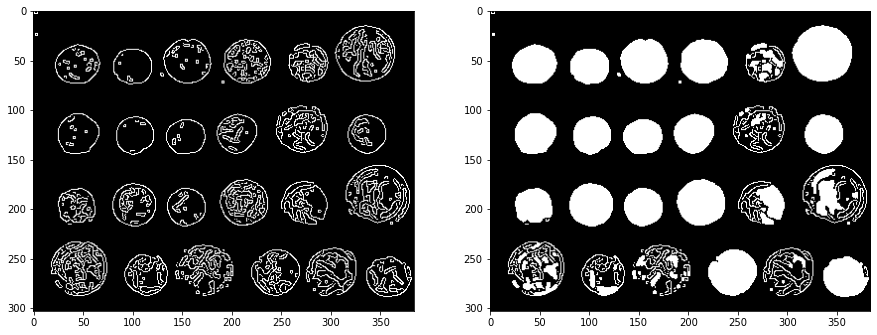

In [113]:
aux = ndi.binary_fill_holes(coins_canny)
fig, ax = plt.subplots(1,2,figsize=(15,15))
ax[0].imshow(coins_canny, cmap="gray")
ax[1].imshow(aux, cmap="gray")